In [7]:
import construction as cs
import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Figure sotto 

# Load generated graphs

In [8]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name,gap = 299 ):
    path = "../Generated_graphs/Multiple_run/"+file_name+"/"
    
    graphs = []
    for i in os.listdir(path)[0:2]:
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs


def load_dym_graph(file_name,gap = 0):
    path = "../Competitors_generated_graphs/Dymond/Multiple_run/"+file_name+"/"
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_stm_graph(file_name,gap=0):
    path = "../Competitors_generated_graphs/STM/Multiple_run/"+file_name+"/"
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

def load_tag_graph(file_name,gap=0):
    path = "../Competitors_generated_graphs/TagGen/Multiple_run/"+file_name+"/"
    graphs = []
    for i in os.listdir(path)[0:2]:
        print(path+i)
        data_in = cs.load_data(path+i)
        graphs_in = cs.build_graphs(data_in,gap=gap)
        graphs.append(graphs_in)
    return graphs

In [9]:
import networkx as nx
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from topological_metrics import *

import os

# Compute and store topological stuff

# motifs snap

In [10]:
import networkx as nx
import itertools 

In [11]:

from networkx.algorithms import isomorphism


def count_subgraphs2(graph, subgraph):
    count = 0
    GM = isomorphism.GraphMatcher(graph, subgraph)
    c = 0 
    for i in GM.subgraph_isomorphisms_iter():
        c = c +1 
    return c




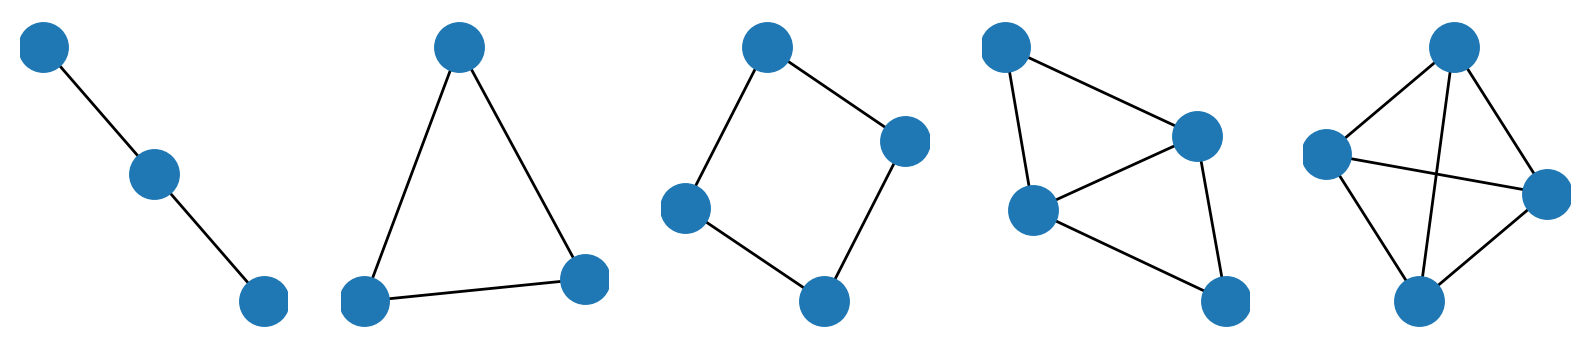

In [12]:
motifs = {"s1":nx.Graph([(1,2),(2,3)]),
         "s2":nx.Graph([(1,2),(2,3),(3,1)]),
         "s3":nx.Graph([(1,2),(2,3),(3,4),(4,1)]),
         "s4":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4)]),
         "s5":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4),(1,3)])}

c = 1
plt.figure(figsize=(10,2))
for k,v in motifs.items():
    plt.subplot(1,5,c)
    nx.draw(v)
    c = c + 1

# load agg graph

In [ ]:
file_name = "InVS13"

M = 30
ori = load_origin_graph(file_name,gap=299*M)
etn_gen = load_ETNgen_graph(file_name,gap=299*M)
dym_gen = load_dym_graph(file_name,gap=1*M)
stm_gen = load_stm_graph(file_name,gap=1*M)
tag_gen = load_tag_graph(file_name,gap=1*M)

In [ ]:
len(ori),len(etn_gen[0]),len(tag_gen[0]),len(stm_gen[0]),len(dym_gen[0])

In [ ]:
occs_ori = {"s1":[],
             "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in ori:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_ori[k].append(occurrences)

In [ ]:
occs_etn = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in etn_gen[0]:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_etn[k].append(occurrences)

In [ ]:
occs_tag = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in tag_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_tag[k].append(occurrences)
        
    if c%10 ==0:
        print(len(tag_gen[0]),c)

In [ ]:
occs_stm = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in stm_gen[0]:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_stm[k].append(occurrences)

In [ ]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%10 ==0:
        print(len(dym_gen[0]),c)

In [ ]:
occs_dym

In [ ]:
s = "s5"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
#plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
#plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()

In [ ]:
s = "s4"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
#plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
#plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()

In [ ]:
s = "s3"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
s = "s2"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")

plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
s = "s1"
plt.figure(figsize=(10,2))
plt.plot(s)
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.legend()
plt.show()
plt.figure(figsize=(10,2))
plt.plot(occs_ori[s],label="ori")
plt.plot(occs_etn[s],label="NOI")
plt.plot(occs_stm[s],label="stm")
#plt.plot(occs_tag[s],label="tag")
plt.plot(occs_dym[s],label="dym")
plt.yscale("log")
plt.legend()
plt.show()

In [ ]:
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_tag, file,indent=2)

In [ ]:
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_etn, file,indent=2)

In [ ]:
import json
with open("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_stm, file,indent=2)

In [ ]:
import json
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

In [ ]:
import json
with open("topology_results/original_distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_ori, file,indent=2)

# lh10

In [11]:
file_name = "LH10"

M = 30
ori = load_origin_graph(file_name,gap=299*M)
#etn_gen = load_ETNgen_graph(file_name,gap=299*M)
#dym_gen = load_dym_graph(file_name,gap=1*M)
#stm_gen = load_stm_graph(file_name,gap=1*M)
tag_gen = load_tag_graph(file_name,gap=1*M)

../Competitors_generated_graphs/TagGen/Multiple_run/LH10/LH10_1_generato_TagGen.dat
../Competitors_generated_graphs/TagGen/Multiple_run/LH10/LH10_3_generato_TagGen.dat


In [13]:
#len(ori),len(etn_gen[0]),len(tag_gen[0]),len(stm_gen[0]),len(dym_gen[0])
len(ori),len(tag_gen[0])

(39, 38)

In [18]:
occs_ori = {"s1":[],
             "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in ori:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_ori[k].append(occurrences)

In [20]:
import json
with open("topology_results/original_distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_ori, file,indent=2)

In [ ]:
occs_etn = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in etn_gen[0]:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_etn[k].append(occurrences)

In [ ]:
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_etn, file,indent=2)

In [24]:
occs_tag = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in tag_gen[1]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_tag[k].append(occurrences)
        
    if c%3 ==0:
        print(len(tag_gen[0]),c)
        
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_tag, file,indent=2)

38 3
38 6
38 9
38 12
38 15
38 18
38 21
38 24
38 27
38 30
38 33
38 36


In [ ]:
occs_stm = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in stm_gen[0]:
    c = c  + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_stm[k].append(occurrences)
    if c%3 ==0:
        print(len(stm_gen[0]),c)
with open("topology_results/stmgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_stm, file,indent=2)

In [ ]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%3 ==0:
        print(len(dym_gen[0]),c)
        
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

# HighSchool

In [ ]:
file_name = "High_School11"

M = 30
ori = load_origin_graph(file_name,gap=299*M)
etn_gen = load_ETNgen_graph(file_name,gap=299*M)
dym_gen = load_dym_graph(file_name,gap=1*M)
stm_gen = load_stm_graph(file_name,gap=1*M)
tag_gen = load_tag_graph(file_name,gap=1*M)

In [ ]:
len(ori),len(etn_gen[0]),len(tag_gen[0]),len(stm_gen[0]),len(dym_gen[0])

In [ ]:
occs_ori = {"s1":[],
             "s2":[],
             "s3":[],"s4":[],"s5":[]}
for graph in ori:
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_ori[k].append(occurrences)

In [ ]:
import json
with open("topology_results/original_distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_ori, file,indent=2)

In [ ]:
occs_etn = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in etn_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_etn[k].append(occurrences)
    if c%3 == 0:
        print(c)
import json
with open("topology_results/etngen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_etn, file,indent=2)

In [ ]:
occs_tag = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}
c = 0
for graph in tag_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_tag[k].append(occurrences)
        
    if c%3 ==0:
        print(len(tag_gen[0]),c)
        
import json
with open("topology_results/taggen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_tag, file,indent=2)

In [ ]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%3 ==0:
        print(len(dym_gen[0]),c)
        
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

In [ ]:
occs_dym = {"s1":[],
            "s2":[],
             "s3":[],"s4":[],"s5":[]}

c = 0
for graph in dym_gen[0]:
    c = c + 1
    for k,subgraph in motifs.items():
        occurrences = count_subgraphs2(graph, subgraph)
        occs_dym[k].append(occurrences)
        
            
    if c%3 ==0:
        print(len(dym_gen[0]),c)
        
with open("topology_results/dymgen/Multiple_run/distributions/"+file_name+"/motifs_snap.json", "w") as file:
    json.dump(occs_dym, file,indent=2)

# load and plot motifs per snpashot

In [13]:
def load_motif_counts(file_name):
    ori_count = json.load(open("topology_results/original_distributions/"+file_name+"/motifs_snap.json"))
    etn_count = json.load( open('topology_results/etngen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    tag_count = json.load( open('topology_results/taggen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    stm_count = json.load( open('topology_results/stmgen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    dym_count = json.load( open('topology_results/dymgen/Multiple_run/distributions/'+file_name+'/motifs_snap.json'))
    
    return ori_count,etn_count,tag_count,stm_count,dym_count

In [14]:
import json

In [15]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

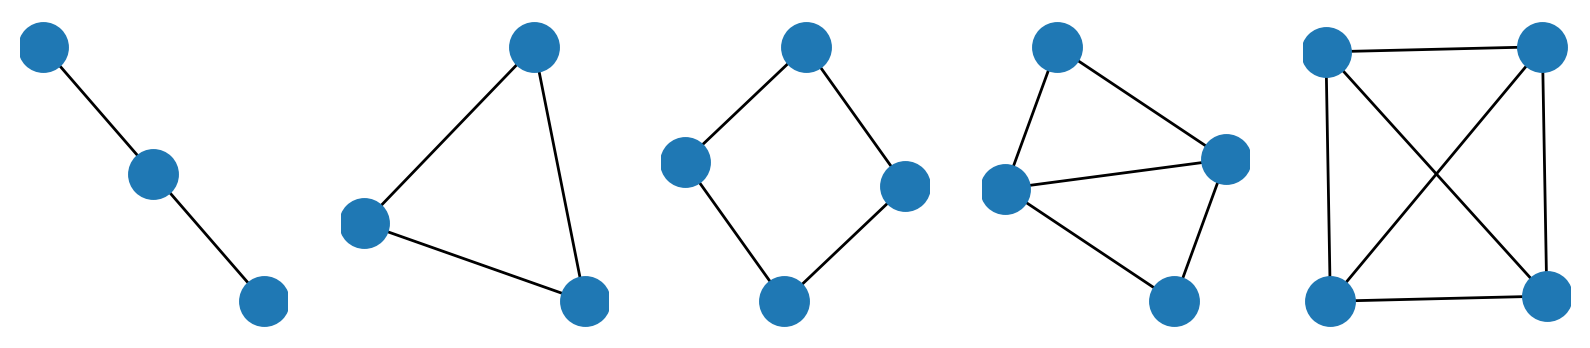

In [16]:
motifs = {"s1":nx.Graph([(1,2),(2,3)]),
         "s2":nx.Graph([(1,2),(2,3),(3,1)]),
         "s3":nx.Graph([(1,2),(2,3),(3,4),(4,1)]),
         "s4":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4)]),
         "s5":nx.Graph([(1,2),(2,3),(3,4),(4,1),(2,4),(1,3)])}

c = 1
plt.figure(figsize=(10,2))
for k,v in motifs.items():
    plt.subplot(1,5,c)
    nx.draw(v)
    c = c + 1

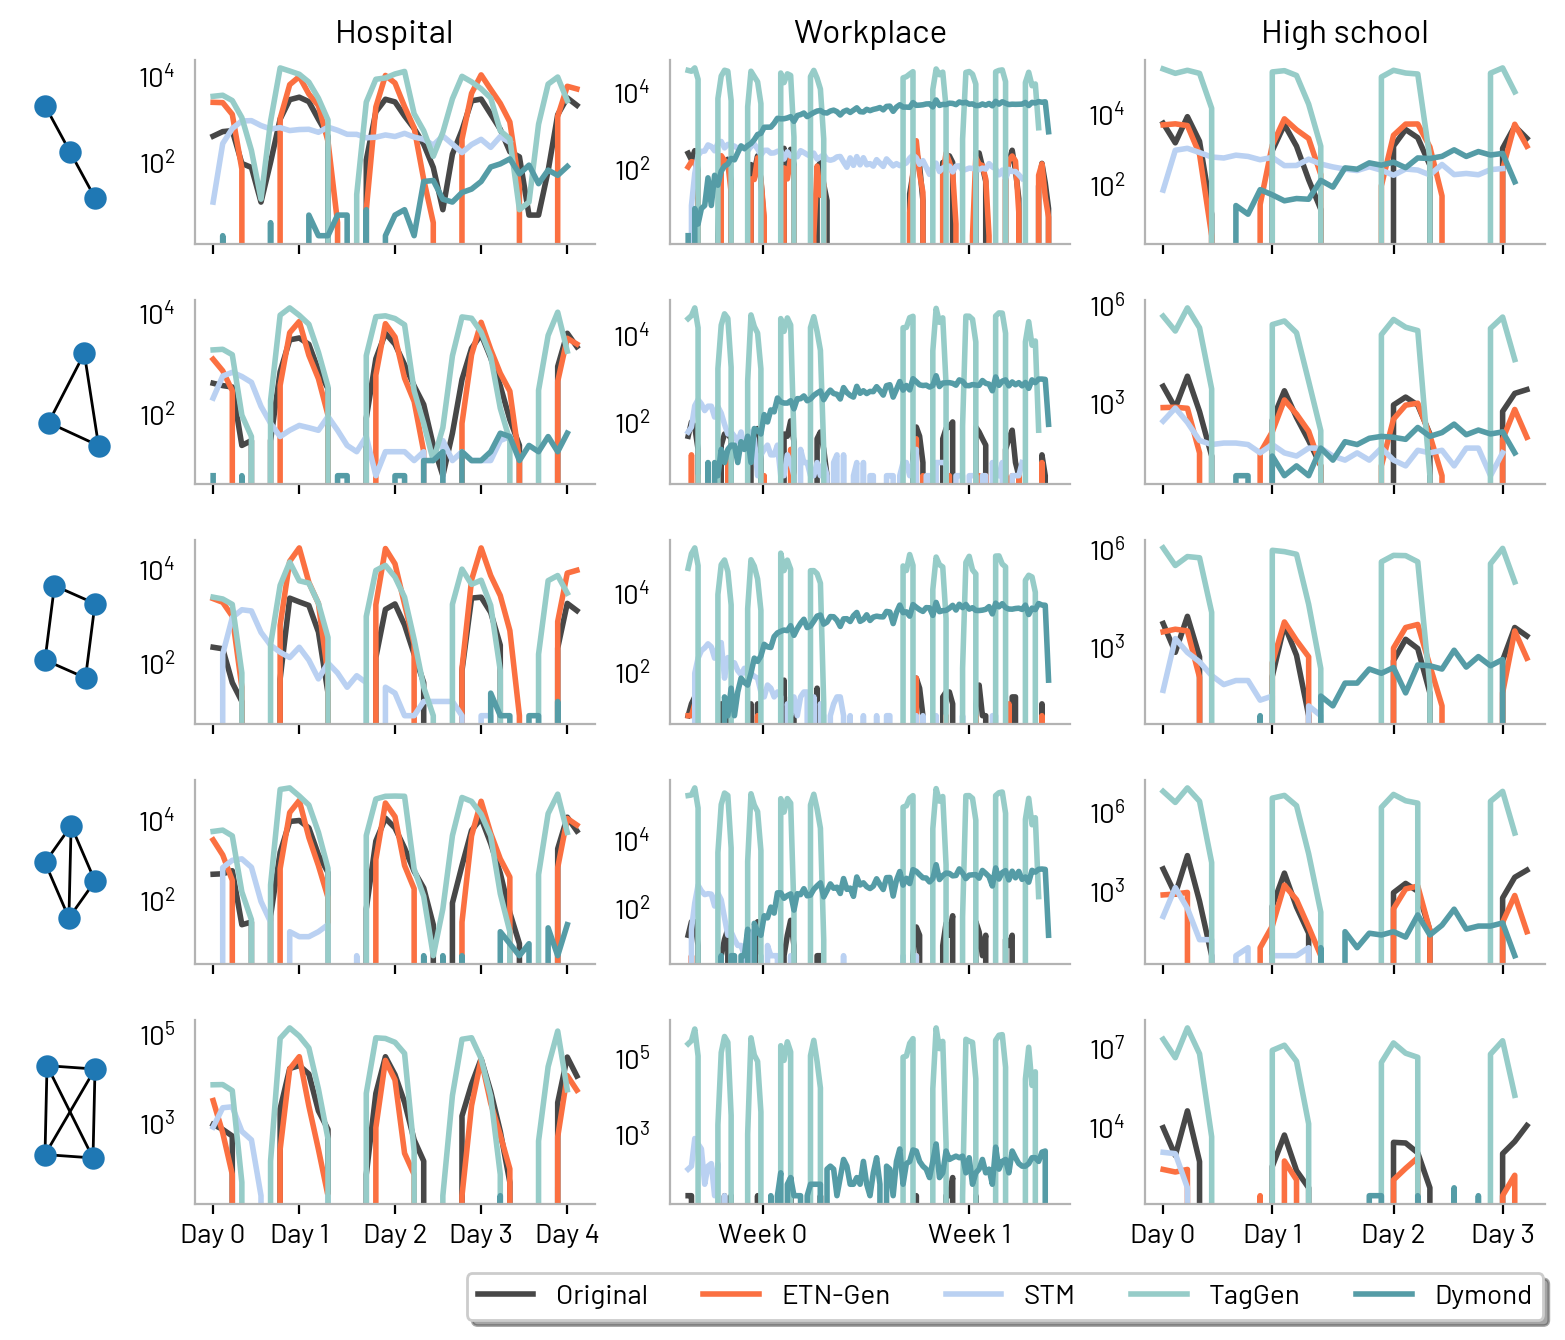

In [21]:
fig, ax = plt.subplots(5,4,figsize=(8,6),sharey=False, gridspec_kw={'width_ratios': [1,4,4,4]})
fig.tight_layout(pad=0)
a = 1
lw = 2
c = 0

file_name = "LH10"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)
for s in ["s1","s2","s3","s4","s5"]:
    if s == "s1":
        ax[c][1].set_title("Hospital")
    ax[c][1].plot(ori_count[s],label="Original",alpha=1,color=ORIGINAL_COLOR,linewidth=lw)
    ax[c][1].plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    ax[c][1].plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    ax[c][1].plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    ax[c][1].plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)
    
    if s == "s5":
        ax[c][1].set_xticks([0,9,19,28,37])
        ax[c][1].set_xticklabels(["Day 0","Day 1","Day 2","Day 3","Day 4"],rotation=0)
    else:
        ax[c][1].set_xticks([0,9,19,28,37])
        ax[c][1].set_xticklabels([" "," "," "," "," "],rotation=0)
    c = c + 1
    

file_name = "InVS13"
c = 0
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)
for s in ["s1","s2","s3","s4","s5"]:
    if s == "s1":
        ax[c][2].set_title("Workplace")
    ax[c][2].plot(ori_count[s],label="Original",alpha=a,color=ORIGINAL_COLOR,linewidth=lw)
    ax[c][2].plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    ax[c][2].plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    ax[c][2].plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    ax[c][2].plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)

    
    if s == "s5":
        ax[c][2].set_xticks([22.5,85])
        ax[c][2].set_xticklabels(["Week 0","Week 1"],rotation=0)
    else:
        ax[c][2].set_xticks([22.5,85])
        ax[c][2].set_xticklabels([" "," "],rotation=0)
    c = c + 1
    
    
file_name = "High_School11"
c = 0
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)
for s in ["s1","s2","s3","s4","s5"]:
    if s == "s1":
        ax[c][3].set_title("High school")
    ax[c][3].plot(ori_count[s],label="Original",alpha=a,color=ORIGINAL_COLOR,linewidth=lw)
    ax[c][3].plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    ax[c][3].plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    ax[c][3].plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    ax[c][3].plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)
    
    
    if s == "s5":
        ax[c][3].set_xticks([0,9,19,28])
        ax[c][3].set_xticklabels(["Day 0","Day 1","Day 2","Day 3"],rotation=0)
    else:
        ax[c][3].set_xticks([0,9,19,28])
        ax[c][3].set_xticklabels([" "," "," "," "],rotation=0)
    c = c + 1
    
for i in range(3):
    for j in range(5):
        ax[j][i+1].set_yscale("log")
        

ax[4][3].legend(loc='upper center', bbox_to_anchor=(-0.35, -0.3),
          fancybox=True, shadow=True, ncol=5)


g = motifs["s1"]
p = nx.spring_layout(g,seed=10)
kk = 2
tmp = np.array(list(p.values()))[:,0]
ax[0][0].set_xlim(min(tmp)*kk,max(tmp)*kk)
tmp = np.array(list(p.values()))[:,1]
ax[0][0].set_ylim(min(tmp)*kk,max(tmp)*kk)
nx.draw(g,pos=p,ax=ax[0][0],node_size=50)

g = motifs["s2"]
p = nx.spring_layout(g,seed=10)
tmp = np.array(list(p.values()))[:,0]
ax[1][0].set_xlim(min(tmp)*kk,max(tmp)*kk)
tmp = np.array(list(p.values()))[:,1]
ax[1][0].set_ylim(min(tmp)*kk,max(tmp)*kk)
nx.draw(g,pos=p,ax=ax[1][0],node_size=50)


g = motifs["s3"]
p = nx.spring_layout(g,seed=15)
tmp = np.array(list(p.values()))[:,0]
ax[2][0].set_xlim(min(tmp)*kk,max(tmp)*kk)
tmp = np.array(list(p.values()))[:,1]
ax[2][0].set_ylim(min(tmp)*kk,max(tmp)*kk)
nx.draw(g,pos=p,ax=ax[2][0],node_size=50)



g = motifs["s4"]
p = nx.spring_layout(g,seed=17)
tmp = np.array(list(p.values()))[:,0]
ax[3][0].set_xlim(min(tmp)*kk,max(tmp)*kk)
tmp = np.array(list(p.values()))[:,1]
ax[3][0].set_ylim(min(tmp)*kk,max(tmp)*kk)
nx.draw(g,pos=p,ax=ax[3][0],node_size=50)



g = motifs["s5"]
p = nx.spring_layout(g,seed=10)
tmp = np.array(list(p.values()))[:,0]
ax[4][0].set_xlim(min(tmp)*kk,max(tmp)*kk)
tmp = np.array(list(p.values()))[:,1]
ax[4][0].set_ylim(min(tmp)*kk,max(tmp)*kk)
nx.draw(g,pos=p,ax=ax[4][0],node_size=50)


#for i in range(3):
#    for j in range(3):
#        ax[i+1][j+1].set_yscale("log")        

for i in range(5):
    for j in range(3):
        ax[i][j+1].tick_params(bottom=True, right=False,left=False)
        ax[i][j+1].set_axisbelow(True)
        #ax[i+1][j+1].yaxis.grid(True, color='#b3b3b3')
        ax[i][j+1].yaxis.grid(False)
        ax[i][j+1].xaxis.grid(False)

        ax[i][j+1].spines['top'].set_visible(False)
        ax[i][j+1].spines['right'].set_visible(False)
        ax[i][j+1].spines['left'].set_visible(True)
        ax[i][j+1].spines['bottom'].set_visible(True)
        
        ax[i][j+1].spines['bottom'].set_color("#b3b3b3")
        ax[i][j+1].spines['left'].set_color("#b3b3b3")

fig.savefig("COM_PHY_new_fig/motifs_su_snap.pdf", bbox_inches='tight')

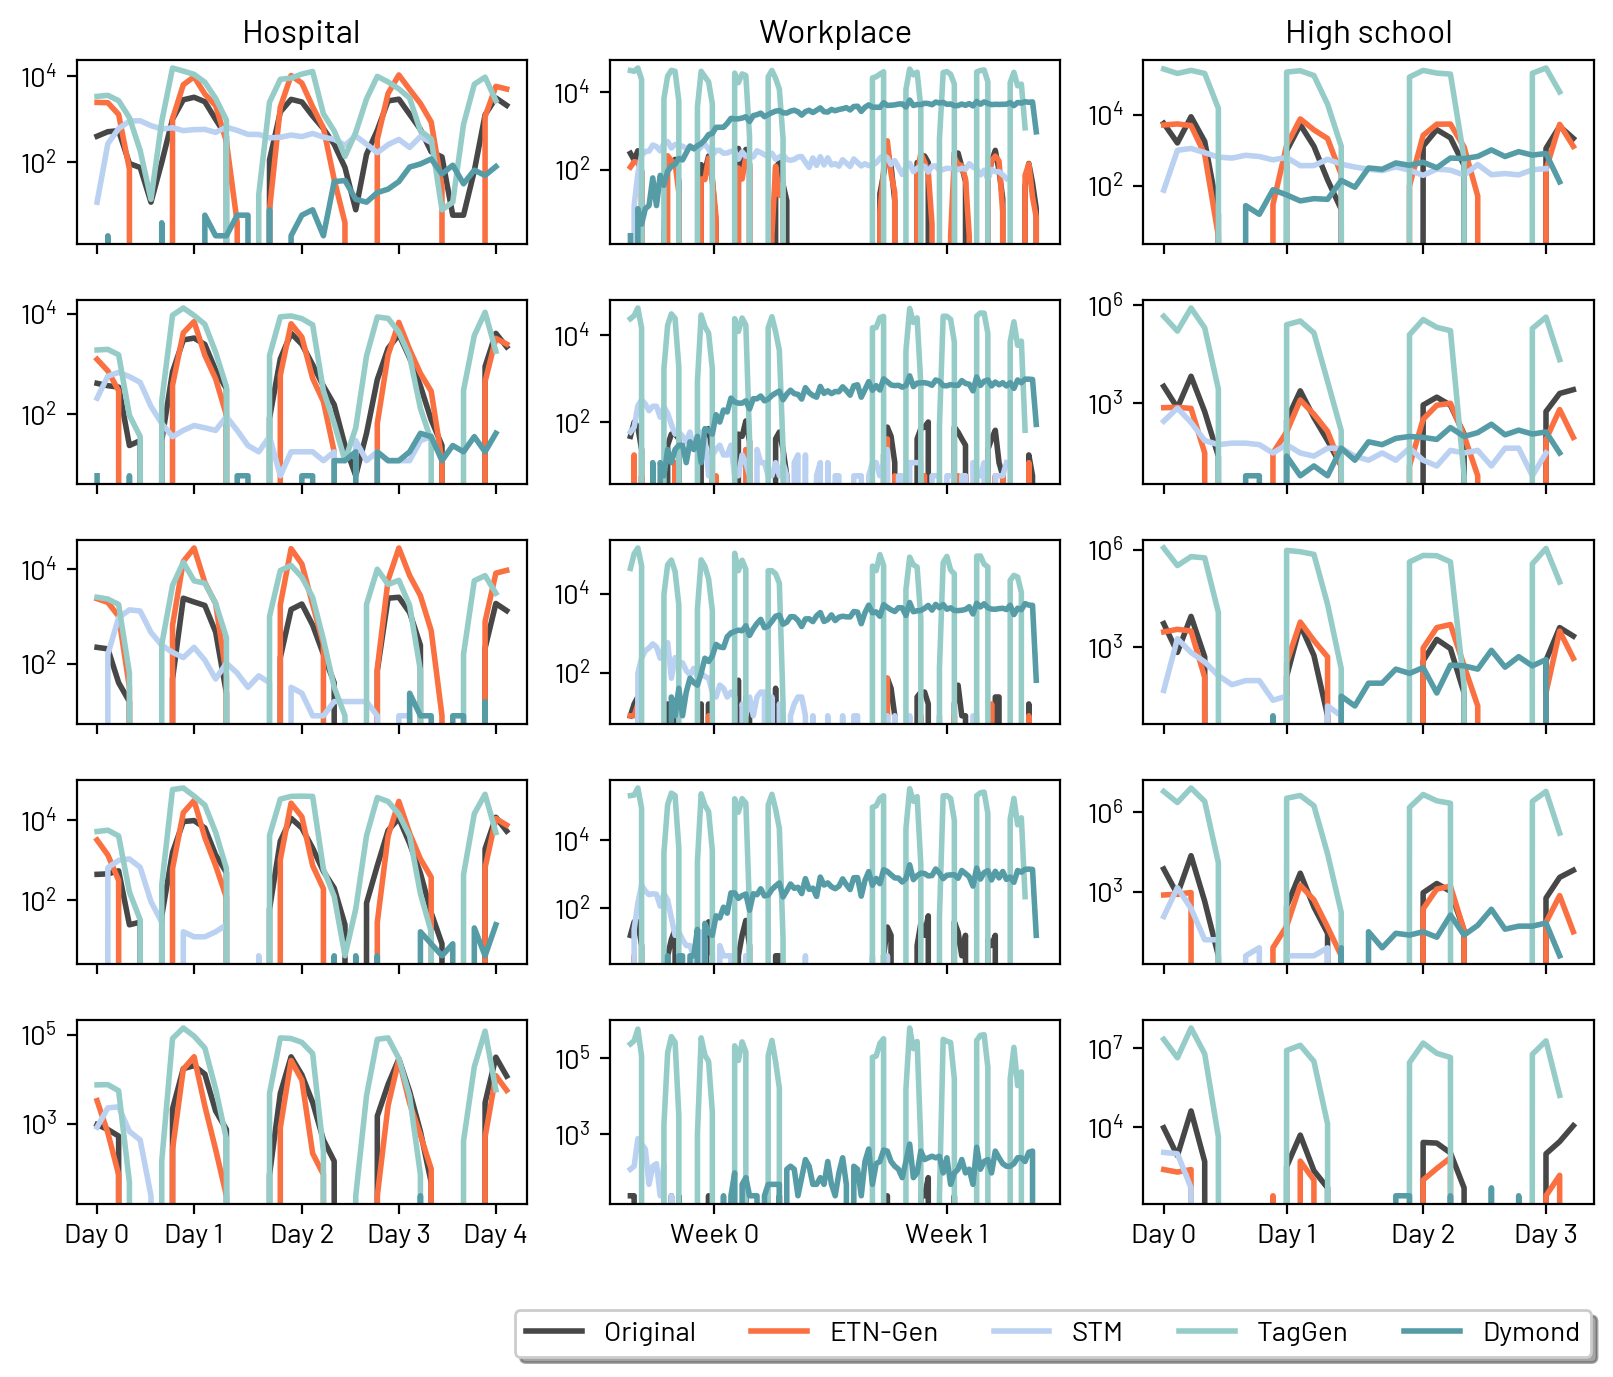

In [82]:
fig, ax = plt.subplots(5,3,figsize=(8,6),sharey=False)
fig.tight_layout(pad=0)
a = 1
lw = 2
c = 0

file_name = "LH10"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)
for s in ["s1","s2","s3","s4","s5"]:
    if s == "s1":
        ax[c][0].set_title("Hospital")
    ax[c][0].plot(ori_count[s],label="Original",alpha=1,color=ORIGINAL_COLOR,linewidth=lw)
    ax[c][0].plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    ax[c][0].plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    ax[c][0].plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    ax[c][0].plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)
    
    if s == "s5":
        ax[c][0].set_xticks([0,9,19,28,37])
        ax[c][0].set_xticklabels(["Day 0","Day 1","Day 2","Day 3","Day 4"],rotation=0)
    else:
        ax[c][0].set_xticks([0,9,19,28,37])
        ax[c][0].set_xticklabels([" "," "," "," "," "],rotation=0)
    c = c + 1
    

file_name = "InVS13"
c = 0
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)
for s in ["s1","s2","s3","s4","s5"]:
    if s == "s1":
        ax[c][1].set_title("Workplace")
    ax[c][1].plot(ori_count[s],label="Original",alpha=a,color=ORIGINAL_COLOR,linewidth=lw)
    ax[c][1].plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    ax[c][1].plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    ax[c][1].plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    ax[c][1].plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)

    
    if s == "s5":
        ax[c][1].set_xticks([22.5,85])
        ax[c][1].set_xticklabels(["Week 0","Week 1"],rotation=0)
    else:
        ax[c][1].set_xticks([22.5,85])
        ax[c][1].set_xticklabels([" "," "],rotation=0)
    c = c + 1
    
    
file_name = "High_School11"
c = 0
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)
for s in ["s1","s2","s3","s4","s5"]:
    if s == "s1":
        ax[c][2].set_title("High school")
    ax[c][2].plot(ori_count[s],label="Original",alpha=a,color=ORIGINAL_COLOR,linewidth=lw)
    ax[c][2].plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    ax[c][2].plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    ax[c][2].plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    ax[c][2].plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)
    
    
    if s == "s5":
        ax[c][2].set_xticks([0,9,19,28])
        ax[c][2].set_xticklabels(["Day 0","Day 1","Day 2","Day 3"],rotation=0)
    else:
        ax[c][2].set_xticks([0,9,19,28])
        ax[c][2].set_xticklabels([" "," "," "," "],rotation=0)
    c = c + 1
    
for i in range(3):
    for j in range(5):
        ax[j][i].set_yscale("log")
        

ax[4][2].legend(loc='upper center', bbox_to_anchor=(-0.2, -0.5),
          fancybox=True, shadow=True, ncol=5)

In [69]:
    #ax[c][0].set_yscale("log")
    #if s == "s5":
    #    .legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
    #          fancybox=True, shadow=True, ncol=5)

In [10]:

ORIGINAL_COLOR = '#474747' #dark grey
ETN_COLOR =  '#fb7041' #'#E5865E' # arancio
TAG_COLOR = '#96ccc8' # light blue
STM_COLOR = '#bad1f2' #8F2E27' # rosso
DYM_COLOR = '#559ca6' # teal

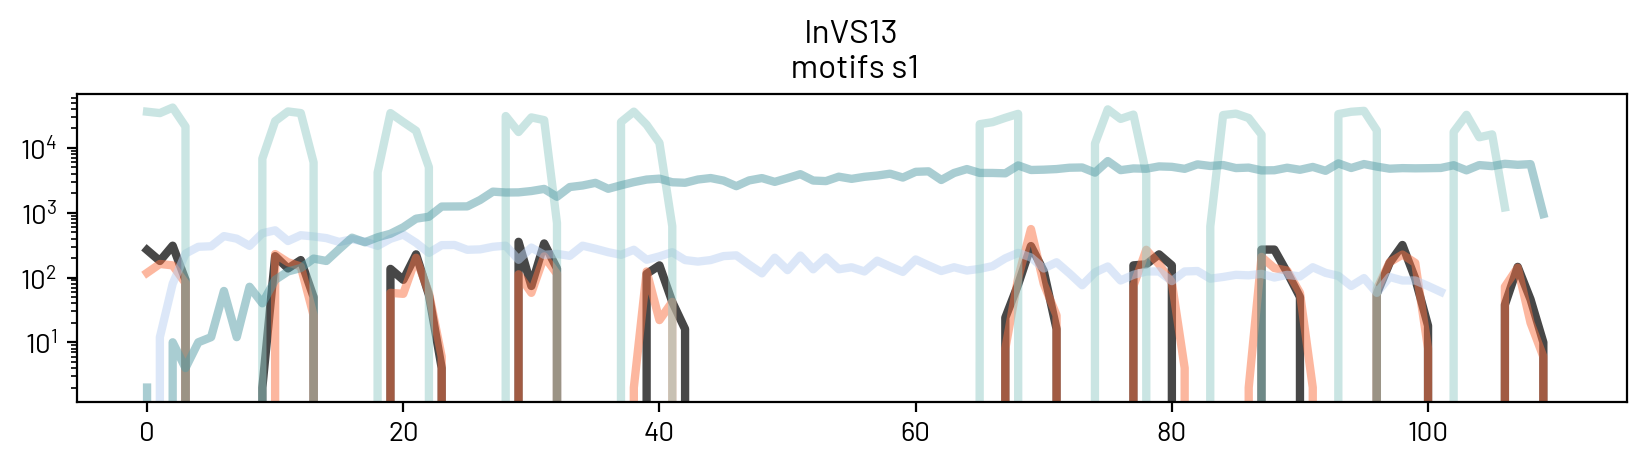

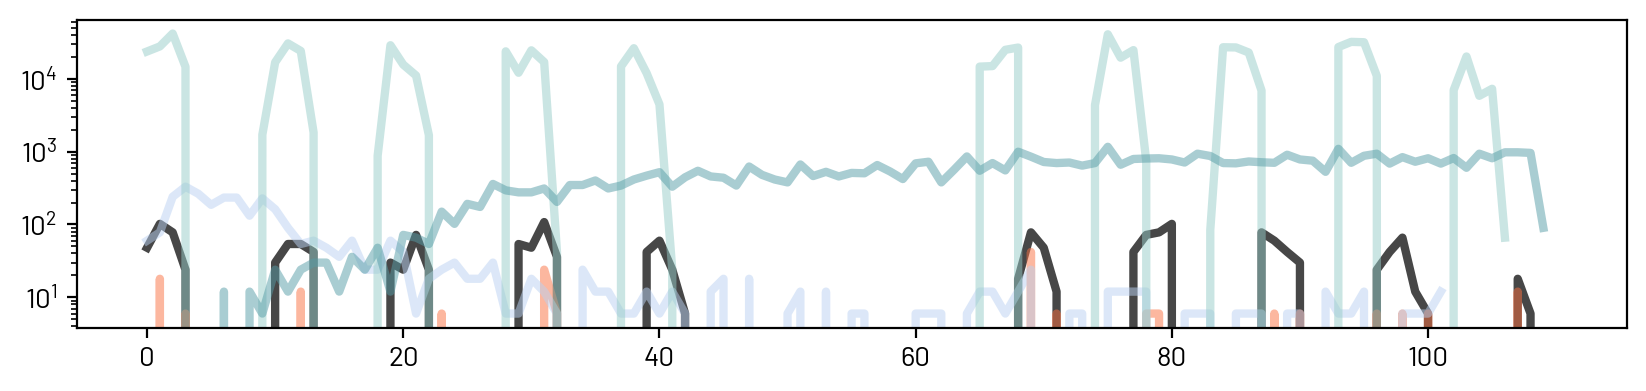

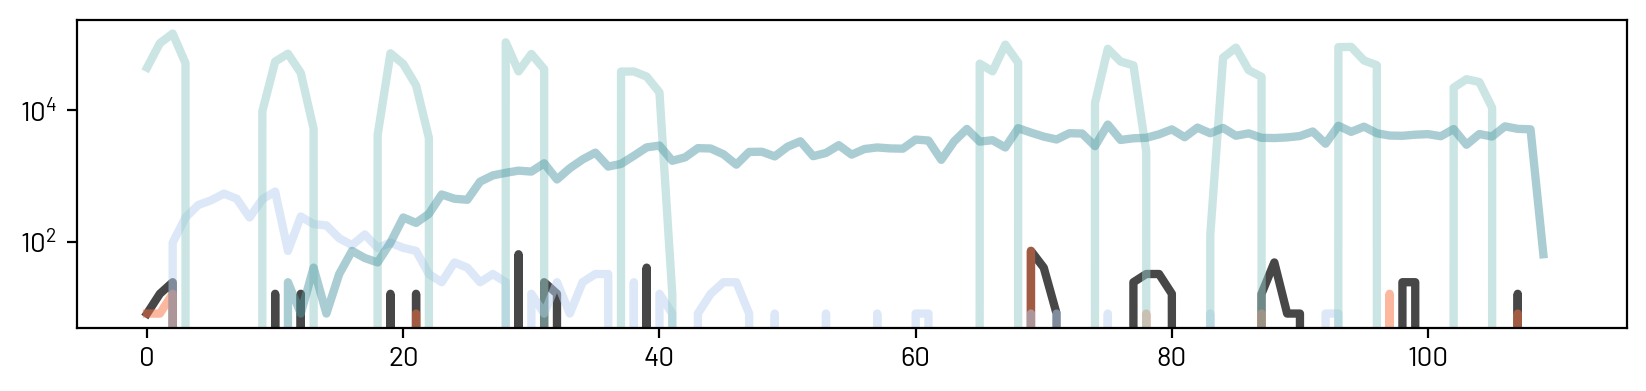

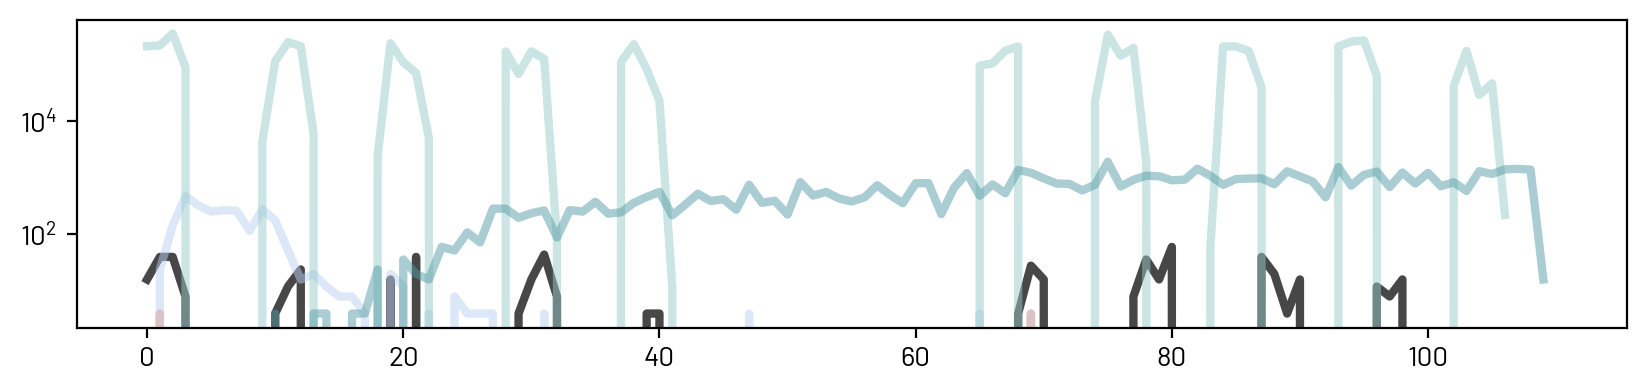

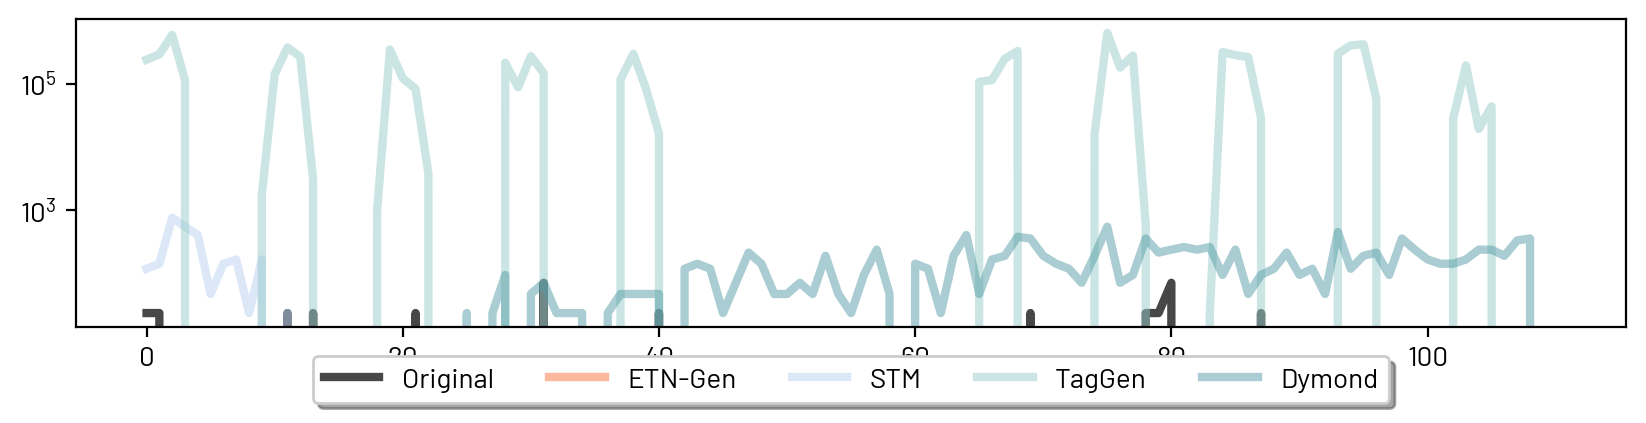

In [12]:
file_name = "InVS13"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)

a = 0.5
lw = 3
for s in ["s1","s2","s3","s4","s5"]:

    plt.figure(figsize=(10,2))
    if s == "s1":
        plt.title(file_name+"\n motifs "+s)
    plt.plot(ori_count[s],label="Original",alpha=1,color=ORIGINAL_COLOR,linewidth=lw)
    plt.plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    plt.plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    plt.plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    plt.plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)
    plt.yscale("log")
    if s == "s5":
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.show()

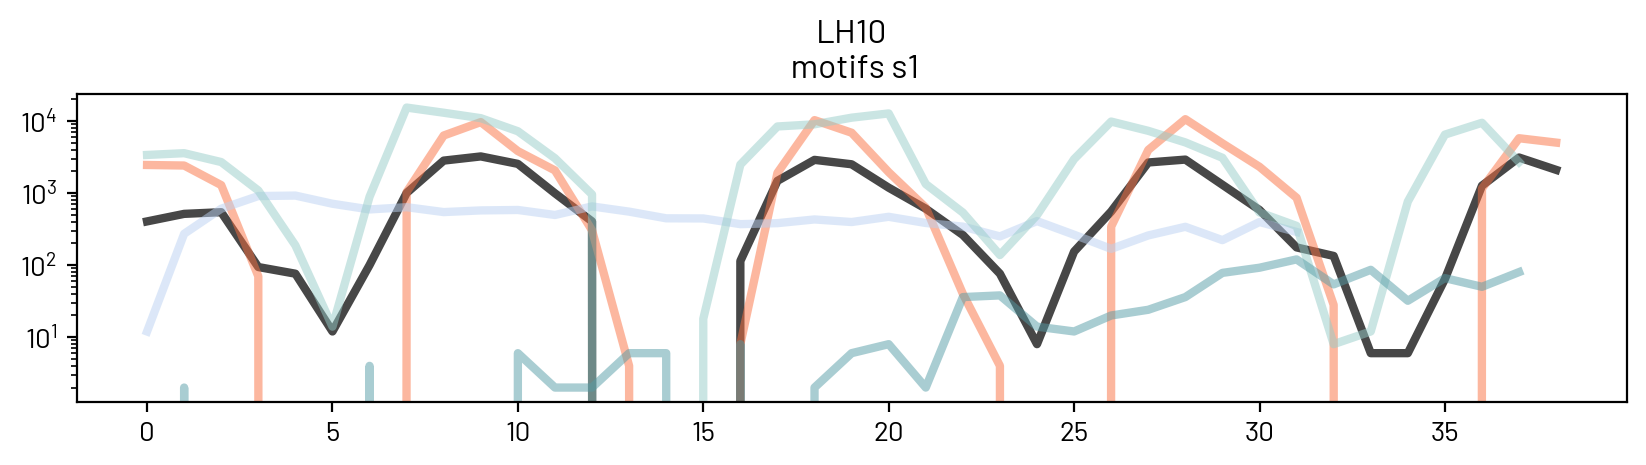

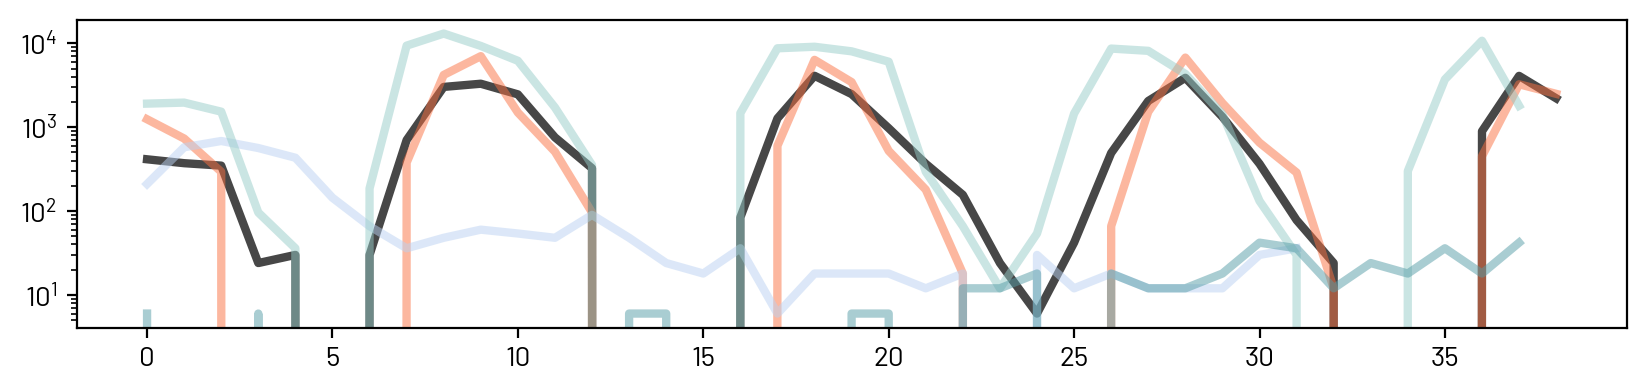

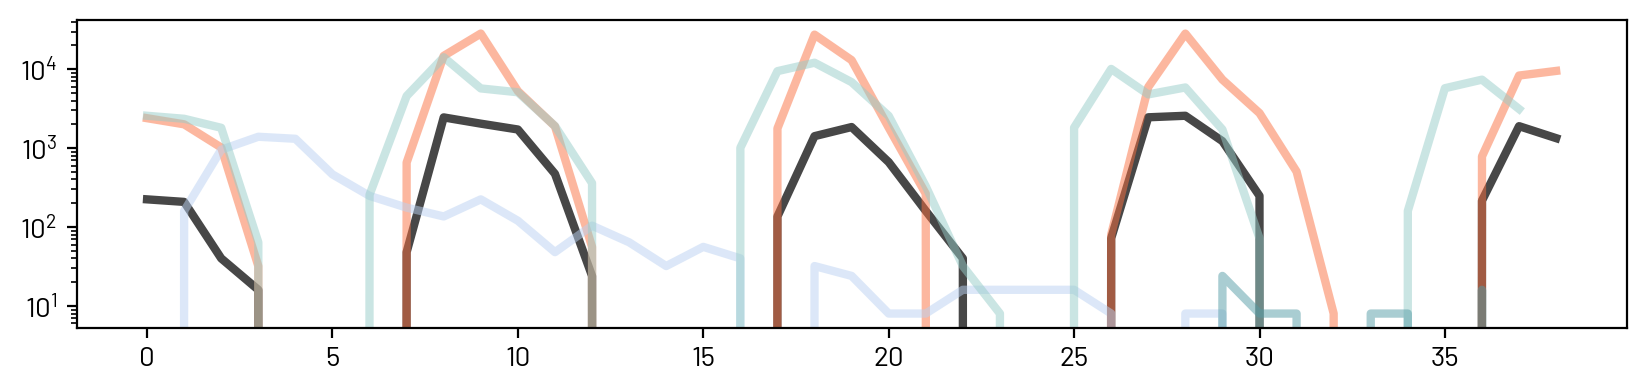

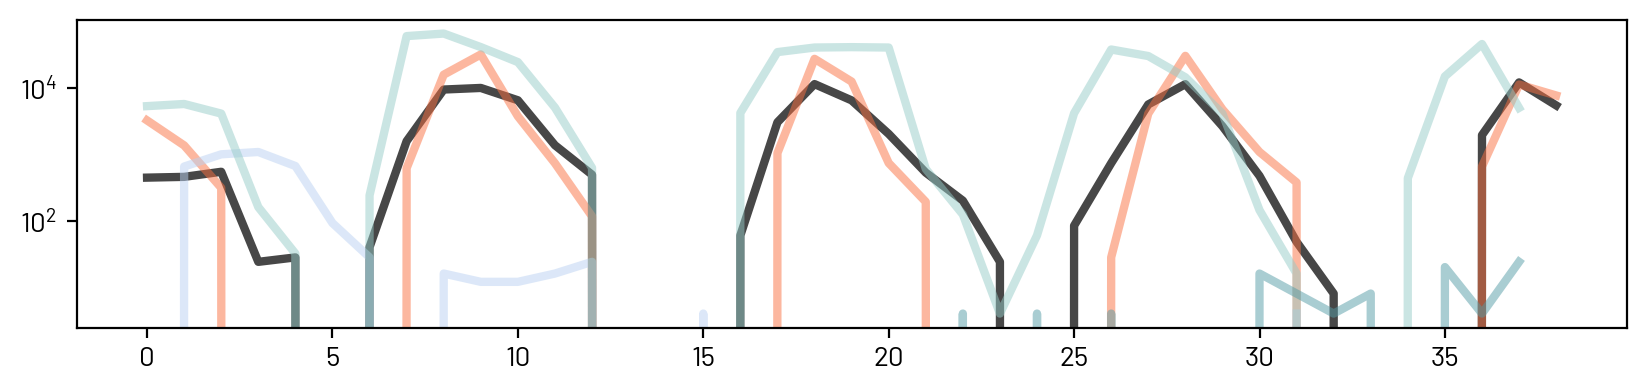

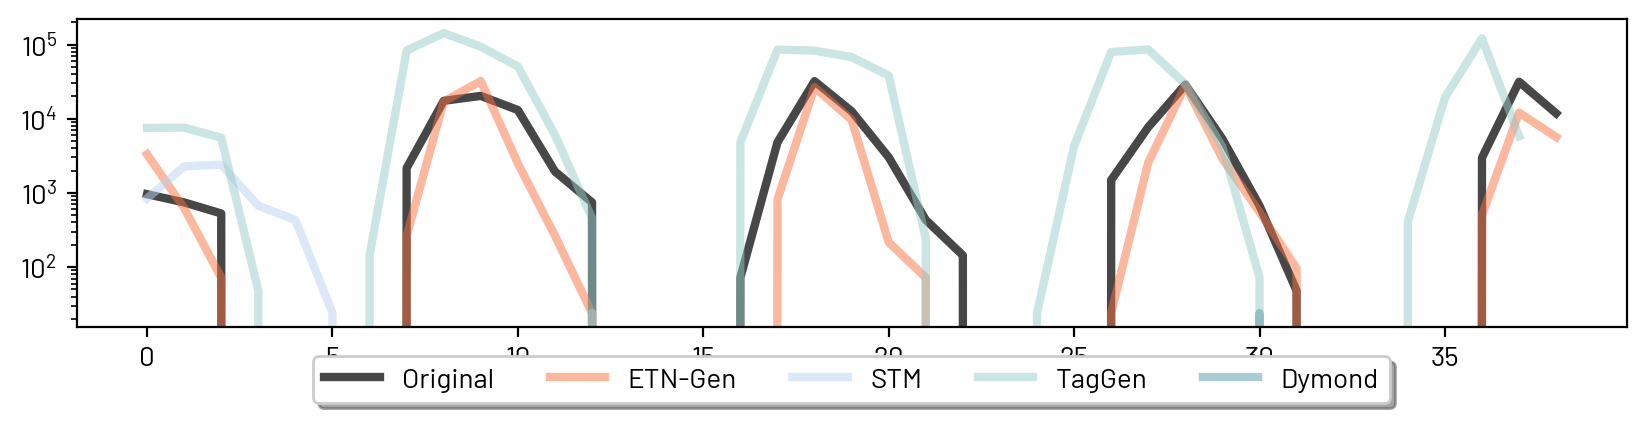

In [13]:
file_name = "LH10"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)

a = 0.5
lw = 3
for s in ["s1","s2","s3","s4","s5"]:

    plt.figure(figsize=(10,2))
    if s == "s1":
        plt.title(file_name+"\n motifs "+s)
    plt.plot(ori_count[s],label="Original",alpha=1,color=ORIGINAL_COLOR,linewidth=lw)
    plt.plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    plt.plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    plt.plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    plt.plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)
    plt.yscale("log")
    if s == "s5":
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.show()

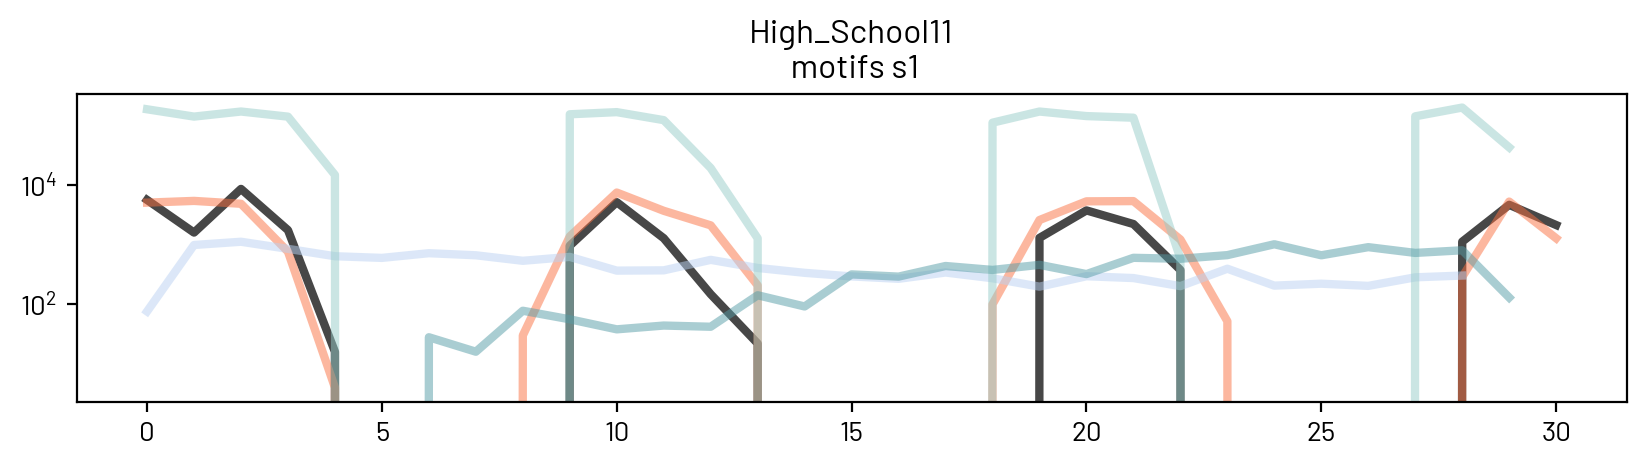

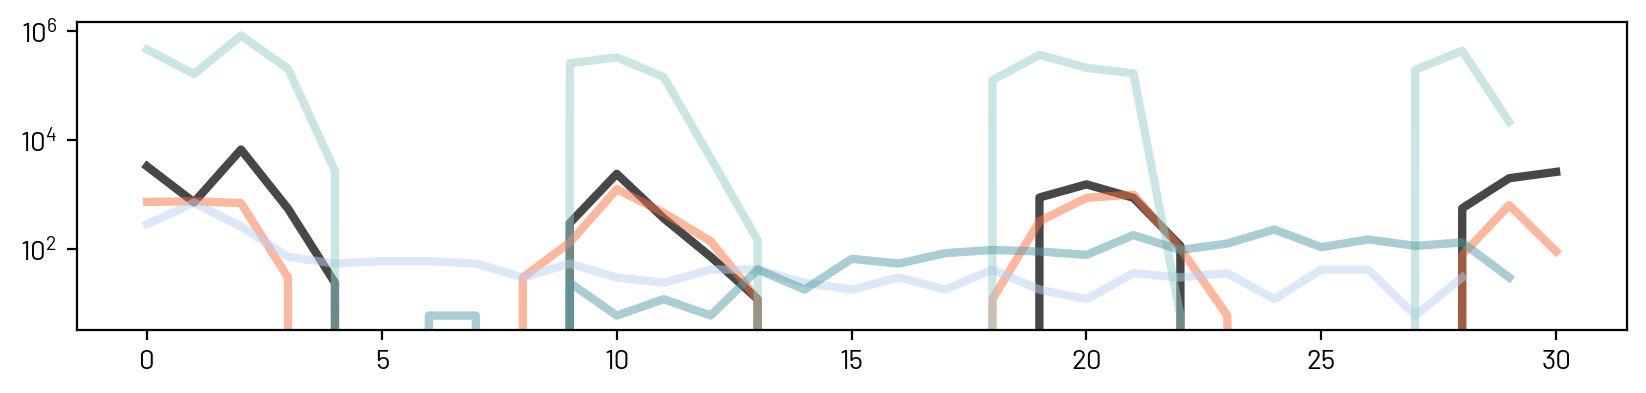

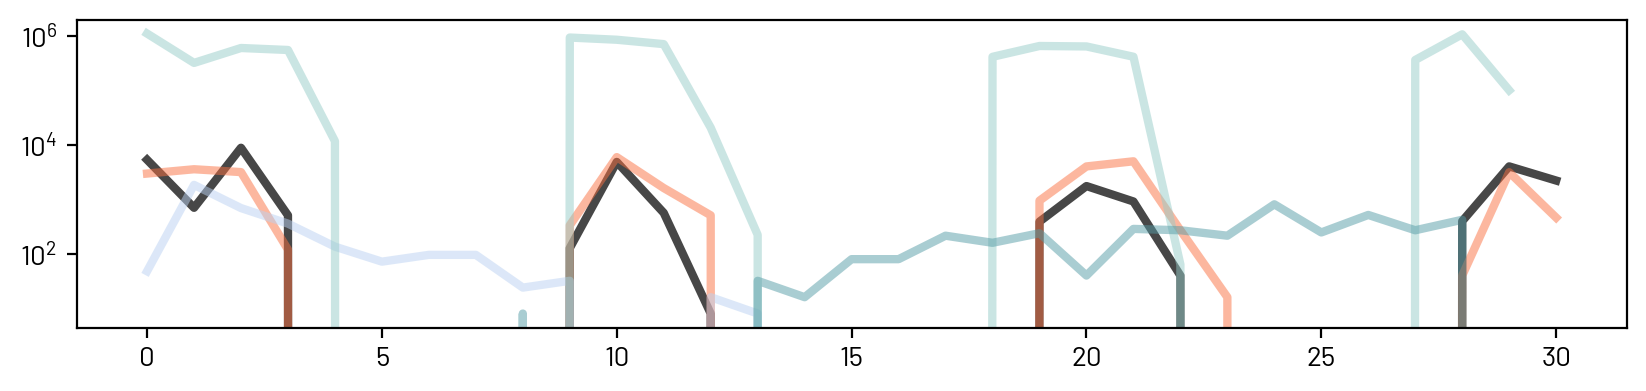

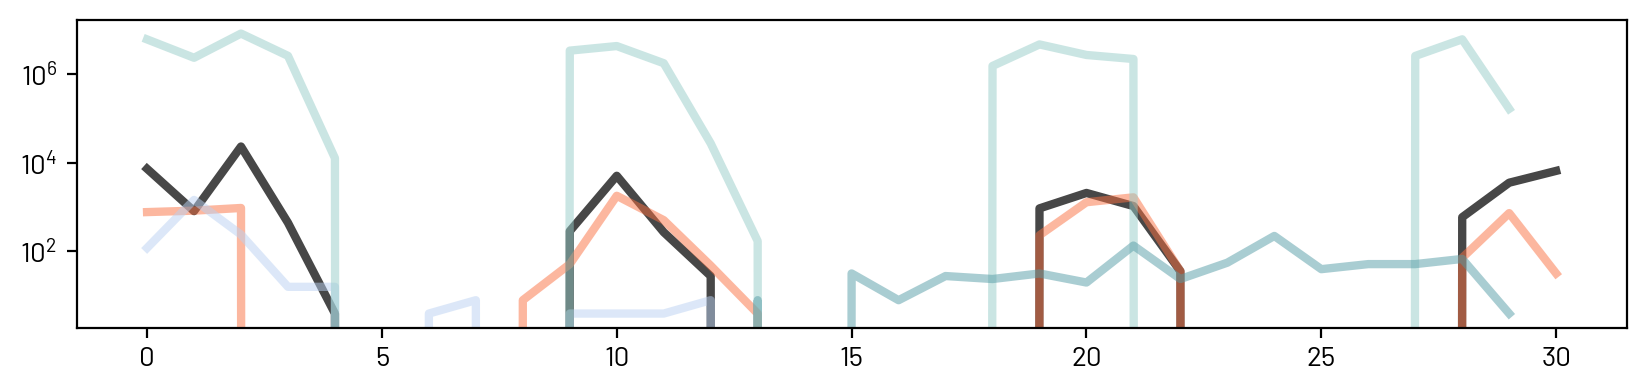

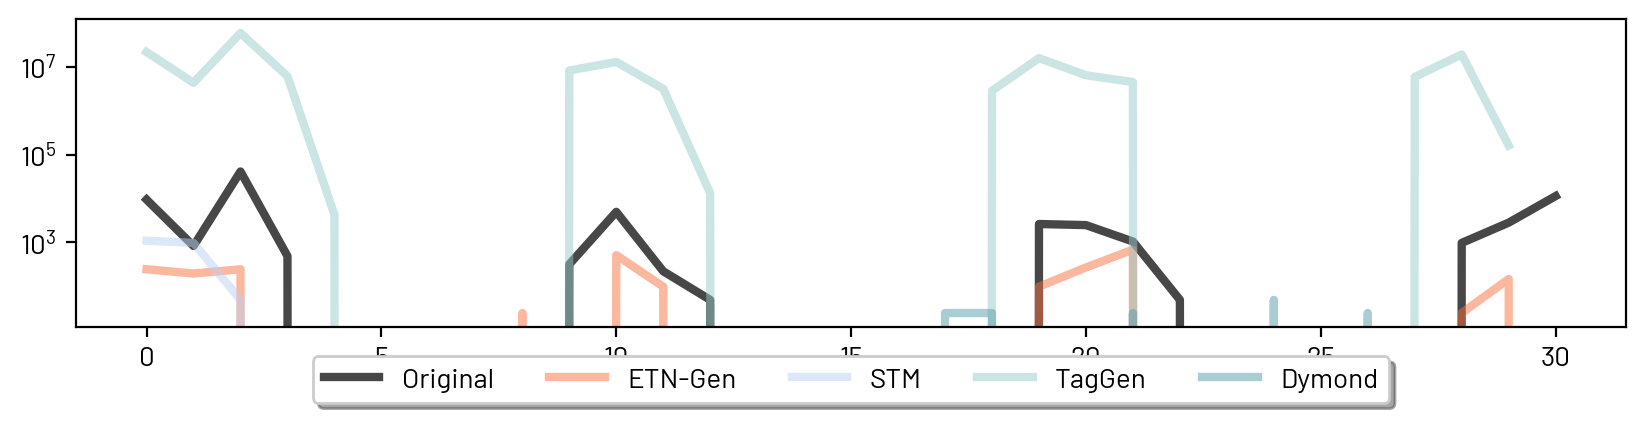

In [14]:
file_name = "High_School11"
ori_count,etn_count,tag_count,stm_count,dym_count = load_motif_counts(file_name)

a = 0.5
lw = 3
for s in ["s1","s2","s3","s4","s5"]:

    plt.figure(figsize=(10,2))
    if s == "s1":
        plt.title(file_name+"\n motifs "+s)
    plt.plot(ori_count[s],label="Original",alpha=1,color=ORIGINAL_COLOR,linewidth=lw)
    plt.plot(etn_count[s],label="ETN-Gen",alpha=a,color=ETN_COLOR,linewidth=lw)
    plt.plot(stm_count[s],label="STM",alpha=a,color=STM_COLOR,linewidth=lw)
    plt.plot(tag_count[s],label="TagGen",alpha=a,color=TAG_COLOR,linewidth=lw)
    plt.plot(dym_count[s],label="Dymond",alpha=a,color=DYM_COLOR,linewidth=lw)
    plt.yscale("log")
    if s == "s5":
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
              fancybox=True, shadow=True, ncol=5)
    plt.show()